# Проект № 4: Анализ сервиса аренды самокатов GoFast
## Описание проекта
Нам были переданы данные популярного сервиса аренды самокатов GoFast о некоторых пользователях из нескольких городов, а также об их поездках. Перед нами стоит задача проанализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
без подписки
- абонентская плата отсутствует;
- стоимость одной минуты поездки — 8 рублей;
- стоимость старта (начала поездки) — 50 рублей;


с подпиской Ultra
- абонентская плата — 199 рублей в месяц;
- стоимость одной минуты поездки — 6 рублей;
- стоимость старта — бесплатно.
## Описание данных
В основных данных есть информация о пользователях, их поездках и подписках. Есть и дополнительная информация — о количестве обращений пользователей в техподдержку сервиса до и после обновления технической инфраструктуры.


- Пользователи — users_go.csv
- Поездки — rides_go.csv
- Подписки — subscriptions_go.csv
## План работы

1) Загрузка данных
    
    Загружаем данные, выводим первые несколько строк и основную информацию о нем.
2) Предобработка данных

    Обработка даты, поиск дубликатов.
3) Исследовательский анализ данных

    Оценим следующие параметры
        
        по датафрейму users:
        - частота встречаемости городов
        - соотношение пользователей с подпиской и без
        - возраст пользователей
        по датафрейму rides:
        - расстояние, которое пользователь преодолел за одну поездку
        - продолжительность поездок
4) Объединение данных

    Объедини данные, выделим из них в разные категории (с и без подписки), проанализируем категории по отдельности.
5) Подсчет выручки

    Созададим датафрейм с агрегированными данными о поездках для каждого пользователя, расчитаем выручку, которую он принес.
6) Проверка гипотез

7) Распределения

8) Общий вывод

In [ ]:
from scipy import stats as st

from math import factorial, sqrt
from google.colab import drive
from importlib import reload

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
import datetime
import random

warnings.filterwarnings("ignore")
drive.mount('/content/drive')

Mounted at /content/drive


#### Шаг 1. Загрузка данных

Работа с данными о пользователях (Users)

In [ ]:
users = pd.read_csv('/content/drive/MyDrive/users_go.csv')
users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


Опишем столбцы с данными

В таблице 5 колонок:
- user_id - идентификатор пользователя (целочисленный типа данных int64)
- name - имя пользователя (текстовый или смешанный тип данных object)
- age - возраст пользователя (целочисленный типа данных int64)
- city - город пользователя (текстовый или смешанный тип данных object)
- subscription_type - тип подписки пользователя (текстовый или смешанный тип данных object)

Пропусков в данных нет.

Работа с данными о поездках (Rides)

In [ ]:
rides = pd.read_csv('/content/drive/MyDrive/rides_go.csv')
rides_length = len(rides)
rides.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [ ]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


Опишем столбцы с данными

В таблице 4 колоноки:
- user_id - идентификатор пользователя (целочисленный типа данных int64)
- distance - расстояние поездки (текстовый или смешанный тип данных object)
- duration - длительность поездки (целочисленный типа данных int64)
- date - дата поездки (текстовый или смешанный тип данных object)

Пропусков в данных нет.

Работа с данными о подписках (Subscriptions)

In [ ]:
subscriptions = pd.read_csv('/content/drive/MyDrive/subscriptions_go.csv')
subscriptions.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [ ]:
subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


Опишем столбцы с данными

В таблице 4 колоноки:
- subscription_type - тип подписки (текстовый или смешанный тип данных object)
- minute_price - цена за минуту (целочисленный типа данных int64)
- start_ride_price - стоимость старта (целочисленный типа данных int64)
- subscription_fee - цена подписки (целочисленный типа данных int64)

В таблице присутствует 2 строки (по 1 строке для каждого типа подписки), пропусков в данных нет.

Вывод:
    
В рамках данного шага нами были загружены данные. Мы также посмотрели несколько первых столбцов и основную информацию о данных, привели их описание.

#### Шаг 2. Предобработка данных

Преобразуем данные из столбца date датафрейма rides в тип данных date. Для более приятного восприятия, округлим значения в столбцах длительности и расстояния до 3 знаков после запятой.

In [ ]:
rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%d')
rides['month'] = rides['date'].dt.month
rides['distance'] = round(rides['distance'], 3)
rides['duration'] = round(rides['duration'], 3)

Проверим наличие дубликатов в столбцах. Удалим их, если они есть.

In [ ]:
users.duplicated().sum()

31

In [ ]:
users.drop_duplicates(inplace=True)
users.duplicated().sum()

0

In [ ]:
rides.duplicated().sum()

0

Отдельно проверим столбец city датафрейма users на наличие неявных дубликатов.

In [ ]:
users['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

Дубликатов нет. Отсутствие пропусков в значениях было проверено в предыдущим пункте. Также выведем статистику по некоторым датафреймам и проверим наличие в нем выбросов и аномальных значений.

In [ ]:
users.describe()

,user_id,age
count,1534.000000,1534.000000
mean,767.500000,24.903520
std,442.971971,4.572367
min,1.000000,12.000000
25%,384.250000,22.000000
50%,767.500000,25.000000
75%,1150.750000,28.000000
max,1534.000000,43.000000


В данных о пользователях аномальных значений и выбросов нет.

In [ ]:
rides.describe()

,user_id,distance,duration,month
count,18068.000000,18068.000000,18068.000000,18068.000000
mean,842.869936,3070.659974,17.805010,6.486772
std,434.734317,1116.831211,6.091052,3.437410
min,1.000000,0.856000,0.500000,1.000000
25%,487.000000,2543.226750,13.597750,4.000000
50%,889.000000,3133.610000,17.678500,6.000000
75%,1213.250000,3776.222750,21.725250,9.000000
max,1534.000000,7211.008000,40.824000,12.000000


В столбце расстояний мы видим минимальное расстояние меньше метра. В стобце длительности минимальное время равно половине минуты. Эти значения кажутся подозрительными. Построим гистограммы распределений этих параметров и оценим, можно ли отбросить аномальные данные.

Обработка выбросов в столбце расстояний.

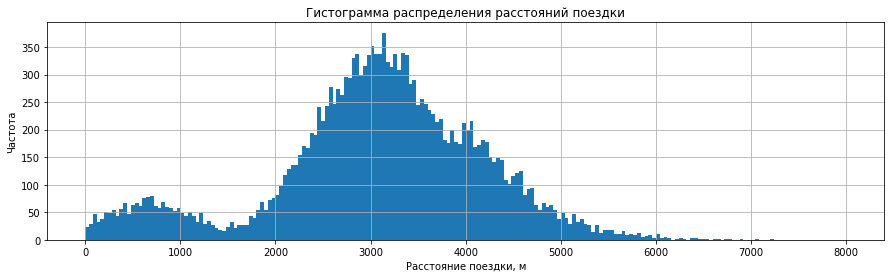

In [ ]:
rides['distance'].hist(bins=200, range=(0,8000), figsize=(15, 4))
plt.xlabel('Расстояние поездки, м')
plt.ylabel('Частота')
plt.title('Гистограмма распределения расстояний поездки');

Как видно на гистограмме значения большие 6 км достаточно редки и могут быть выброшены. Для определения нижней границы рассмотрим гистограммы для значений от 0 м до 150 м.

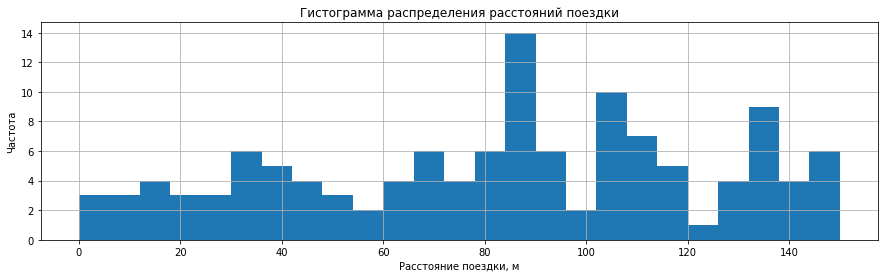

In [ ]:
rides['distance'].hist(bins=25, range=(0, 150), figsize=(15, 4))
plt.xlabel('Расстояние поездки, м')
plt.ylabel('Частота')
plt.title('Гистограмма распределения расстояний поездки')

abnormal_distance = rides.loc[(rides['distance'] < 100) | (rides['distance'] > 6000)].index
rides.drop(index=abnormal_distance, axis=0, inplace=True)

Предполагаем, что брать самокат менее, чем на 100 м нецелесообразно, так как затраты по времени на аренду и поездку будут больше, чем время на дойти пешком, поэтому установим это значение в качестве нижней границы.

In [ ]:
loss_ratio_distance = (len(abnormal_distance) / rides_length) * 100
round(loss_ratio_distance, 2)

0.69

Выше рассчитали процент выкидываемых данных от общего количества, получили 0.69 < 1%, значит объем выкидываемых данных нормальный.

Обработка выбросов в столбце длительности.

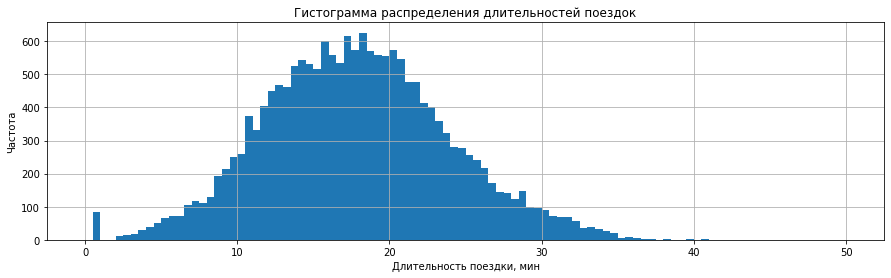

In [ ]:
rides['duration'].hist(bins=100, range=(0,50), figsize=(15,4))
plt.xlabel('Длительность поездки, мин')
plt.ylabel('Частота')
plt.title('Гистограмма распределения длительностей поездок');

Наблюдаемая гистограмма подходит под нормальное распределение, однако мы видим выбросы в районе 0 - 3 минут. Также в силу малого количества значений после 40 минут удалим их.

In [ ]:
abnormal_duration = rides.loc[(rides['duration'] < 3) | (rides['duration'] > 40)].index
rides.drop(index=abnormal_duration, axis=0, inplace=True)
loss_ratio_duration = (len(abnormal_duration) / rides_length) * 100
round(loss_ratio_duration, 2)

0.61

Полученный процент удаляемых данных равен 0.61 < 1 %, значит объем данных для удаления подобран правильно.

Проверим, что общий объем удаляемых данных по всем столбцам меньше 5 %, чтобы убедиться в правомерности удалений.

In [ ]:
round(((len(abnormal_distance) + len(abnormal_duration))/ rides_length) * 100, 2)

1.3

Вывод:
    
   В рамках данного шага мы привели обработали данные так, чтобы с ними было удобно работать и полученная выборка верно отражала информацию о генеральной совокупности. Для этого мы изменили некоторые типы данных, округлили значения, обработали дубликаты и аномальные значения.

#### Шаг 3. Исследовательский анализ данных

Проанализируем данные. Посмотрим на частоту встречаемости городов, соотношение пользователей с подпиской и без, возраст пользователей, расстояние за 1 поездку пользователей и продолжительность поездок.

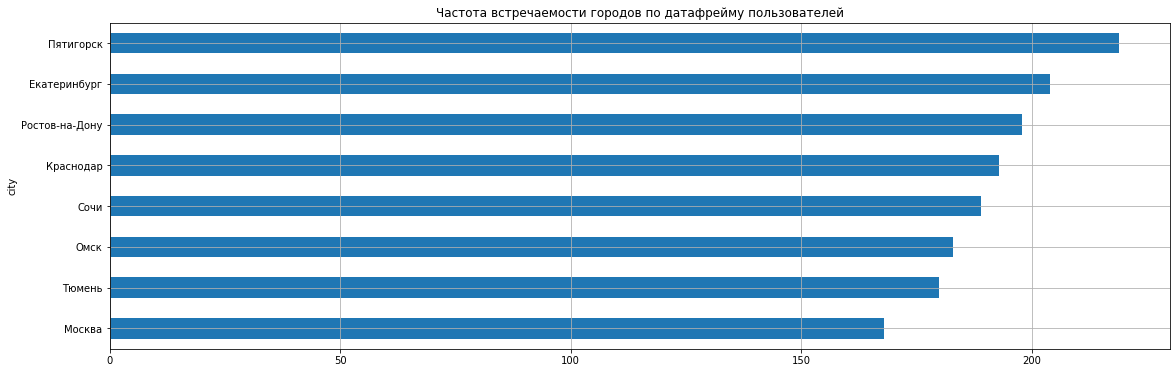

In [ ]:
(users
 .groupby(by='city')['user_id']
 .count()
 .sort_values()
 .plot(kind = 'barh', figsize = (19,6), grid=True, title='Частота встречаемости городов по датафрейму пользователей')
);

На построенной диаграмме мы видим, что в датафрейме присутствуют данные по 8 городам, причем наименьшее количество данных имеется о пользователях из Москвы. Наибольшее количество данных отражает информацию о пользователях из Пятигорска.

,user_id
subscription_type,
free,835
ultra,699


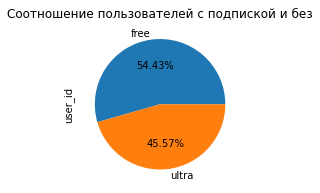

In [ ]:
(users.groupby(by='subscription_type')['user_id']
    .count()
    .sort_values(ascending=False)
    .plot(kind = 'pie', figsize = (3,3),  autopct='%1.2f%%', title='Соотношение пользователей с подпиской и без')
)

users.pivot_table(index='subscription_type', values='user_id', aggfunc='count')

Для анализа соотношения количества пользователей с подпиской и без представим информацию в виде круговой диаграммы. На ней мы видим, что больше пользователей пользуется самокатами без подписки, однако их количество не сильно превышает количество пользователей с подпиской (54.06 и 45.94 % соответственно). Для более полного отражения соотношений мы выведи количественную информацию о пользователях в отдельной таблице.

Для оценки распределения возраста пользователей выведем гистограмму распределения.

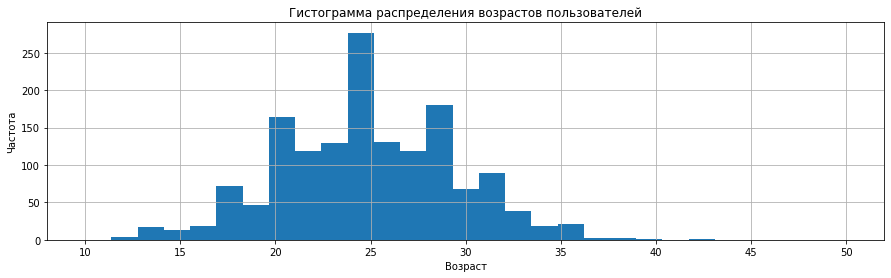

In [ ]:
users['age'].hist(bins=len(users['age'].unique()), range=(10,50), figsize=(15,4))
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.title('Гистограмма распределения возрастов пользователей');

Наблюдаем, что пользователи с возрастом 25 лет чаще других пользуются самокатами. В некотором приближении, полученное распределение можно считать нормальным. Напишем функцию категоризации для значений, по которой оценим доли возрастных групп:
- Ребенок (0 - 17 лет)
- Взрослый до 30 лет (18 - 29 лет)
- Взрослый до 43 лет (30 - 43 года)

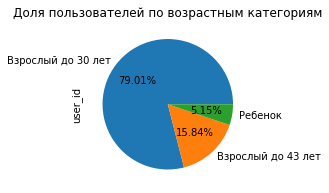

In [ ]:
def age_cat(line):
    age_cat = []
    if line['age'] < 18:
        return 'Ребенок'
    elif line['age'] < 30:
        return 'Взрослый до 30 лет'
    else:
        return 'Взрослый до 43 лет'

users['age_category'] = users.apply(age_cat, axis=1)
(users
 .groupby(by='age_category')['user_id']
 .count()
 .sort_values(ascending=False)
 .plot(kind = 'pie', figsize = (3,3),  autopct='%1.2f%%', title='Доля пользователей по возрастным категориям')
);

Согласно нашей классификации видим, что 79.23 % пользователей - молодые люди в возрасте от 18 до 29 лет. Действительно, на практике, прогуливаясь по улицам города мы можем наблюдать, что в основном использует самокаты именно эта категория. Это можно объяснить постоянным мониторингом популярных технологий, данной категории проще разобраться с процессом регистрации и аренды с помощью мобильных устройств, следование трендам.

Для оценки расстояния, которое проезжает каждый пользователь за одну поездку выведем гистограммы распределения значений из столбца distance.

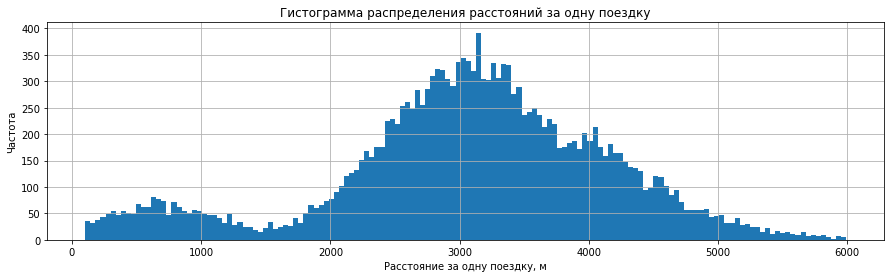

In [ ]:
rides['distance'].hist(bins=150, figsize=(15,4))
plt.xlabel('Расстояние за одну поездку, м')
plt.ylabel('Частота')
plt.title('Гистограмма распределения расстояний за одну поездку');

На гистограмме мы видим 2 локальных максимума: один в области 700 м, другой в области 3000 м, причем оснавная масса значений локализирована в диапазоне от 2000 до 5000 м. Небольшой максимум в начале можно объяснить тем, что некоторые пользователи используют самокаты не только для развлечения и катания, но и для рабочих поездок на небольшие расстояния (например доехать от дома до метро или до работы от метро). На дальние расстояния самокаты в основном берут для катания.

Построим также гистограмму распределения продолжительноти поездок.

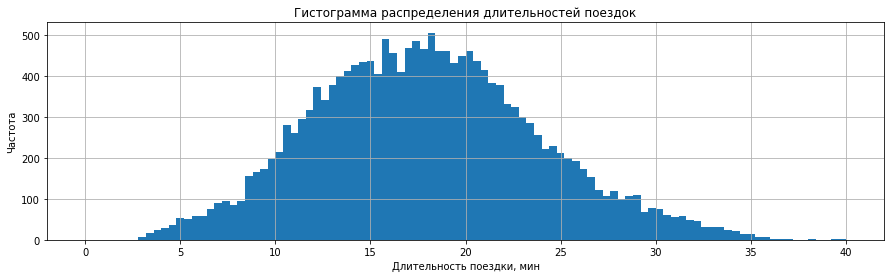

In [ ]:
rides['duration'].hist(bins=100, range=(0,40), figsize=(15,4))
plt.xlabel('Длительность поездки, мин')
plt.ylabel('Частота')
plt.title('Гистограмма распределения длительностей поездок');

В некотором приближении можно считать полученное распределение нормальным. Среднее время, на которое арендуют самокаты составляет порядка 17 - 20 минут, однако наблюдаютс и короткосрочные аренды до 5-10 минут (вероятнее всего эти поездки в основном являются рабочими). Максимальная длительность аренды не превыщает 40 минут.

Вывод:

На данном этапе проекта нами были проанализированы основные данные о пользователях и их поездках. Так, мы узнали, что количество пользователей с подпиской состовляет 45.5% от общего числа пользователей, почти 80% ппользователей - это взрослые от 18 до 30 лет, 15.4% - взрослые до 43 лет и лишь 5.5 процентов составляют дети. По гистограмме распределения расстояний мы предположили, что самокаты используются не только с целью развлечения и отдыха, но и как транспортное средство. Также мы выяснили, что в среднем самокаты арендуют на время 17-20 минут и не более 40 минут.

#### Шаг 4. Объединение данных

Объединим данные в 1 датафрейм. В результате объединения мы должны получить 1 датафрейм с длиной равной размеру самого большого датафрейма (rides).

In [ ]:
data = users.merge(rides, on='user_id', how='outer')
data = data.merge(subscriptions, how='outer')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17833 entries, 0 to 17832
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            17833 non-null  int64         
 1   name               17833 non-null  object        
 2   age                17833 non-null  int64         
 3   city               17833 non-null  object        
 4   subscription_type  17833 non-null  object        
 5   age_category       17833 non-null  object        
 6   distance           17833 non-null  float64       
 7   duration           17833 non-null  float64       
 8   date               17833 non-null  datetime64[ns]
 9   month              17833 non-null  int64         
 10  minute_price       17833 non-null  int64         
 11  start_ride_price   17833 non-null  int64         
 12  subscription_fee   17833 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(4)
memory 

Разделим пользователей с подпиской и без на 2 датафрейма.

In [ ]:
data_free = data.loc[data['subscription_type'] == 'free']
data_ultra = data.loc[data['subscription_type'] == 'ultra']

Сравним информацию расстоянии и длительности поездок для 2 полученных категорий пользователей.

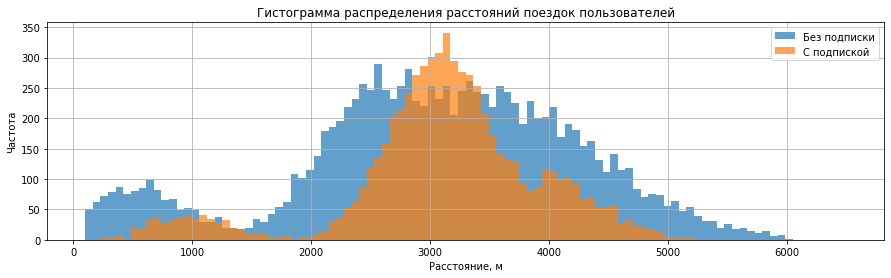

In [ ]:
data_free['distance'].hist(bins=100, range=(100,6500), figsize=(15,4), alpha=0.7, label='Без подписки')
data_ultra['distance'].hist(bins=100, range=(100,6500), figsize=(15,4), alpha=0.7, label='С подпиской')
plt.xlabel('Расстояние, м')
plt.ylabel('Частота')
plt.title('Гистограмма распределения расстояний поездок пользователей')
plt.legend();

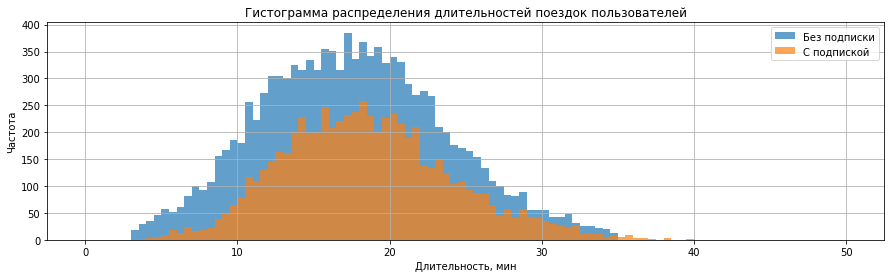

In [ ]:
data_free['duration'].hist(bins=100, range=(0,50), figsize=(15,4), alpha=0.7, label='Без подписки')
data_ultra['duration'].hist(bins=100, range=(0,50), figsize=(15,4), alpha=0.7, label='С подпиской')
plt.xlabel('Длительность, мин')
plt.ylabel('Частота')
plt.title('Гистограмма распределения длительностей поездок пользователей')
plt.legend();

По полученным графикам можно сделать вывод, что самокаты больше арендуют пользователи без подписки, однако на расстояние 2800 м - 3000 м чаще ездят пользователи с подпиской. Для пользователей без подписки в этом диапазоне наблюдается небольшой провал. Также для обеих категорий наблюдаем провал в дальности поездки после первого локального макисмума в районе 1300 м для пользователей без подписки и 1900 м для пользователей с подпиской. Это может быть связано с тем, что такая дальность слишком большая для вынужденных и рабочих поездок, и слишком мала для прогулочных поездок. Сдвиг пользователей с подпиской относительно пользователей без подписки можно объяснить тем, что люди, покупающие подписку скорее всего находят самокаты удобным видом транспорта и возможно даже планируют свои маршруты с учетом применения самокатов, отсюда можно предположить, что дальность передвижения и длительность для них в целом выше.

Рассматривая гистограммы распределения длительностей поездок мы также можем наблюдать очень небольшой сдвиг распределения пользователей с подпиской относительно пользователей без. Это можно определить по наиболее частому значению, а также по "хвостам" графика.

Вывод:

По результатам анализа данных на этом этапе можно сделать вывод, что характер распределений обеих групп (пользователи с и без подписки) схож и отличается только численными значениями.

#### Шаг 5. Подсчёт выручки

Рассчитаем средние параметры по каждому пользователю за каждый месяц.

In [ ]:
agg_dict = {'distance':['sum', 'count'],
            'duration':['sum'],
            'minute_price':'mean',
            'start_ride_price':'mean',
            'subscription_fee':'mean'}
agg_data = data.groupby(by=['user_id', 'month']).agg(agg_dict).reset_index()
columns = ['user_id', 'month', 'sum_distance', 'trip_numb', 'sum_duration'
           , 'minute_price', 'start_ride_price', 'subscription_fee']
agg_data.columns = columns
agg_data.head()

,user_id,month,sum_distance,trip_numb,sum_duration,minute_price,start_ride_price,subscription_fee
0,1,1,7027.511,2,41.417,6,0,199
1,1,4,754.160,1,6.232,6,0,199
2,1,8,6723.470,2,44.777,6,0,199
3,1,10,5809.911,2,31.578,6,0,199
4,1,11,7003.500,3,53.397,6,0,199


Напишем функцию, рассчитывающую месячную прибыль от каждого пользователя и применим ее к каждой строке нашего датафрейма.

In [ ]:
def payment(line):
    res = line['subscription_fee'] + (line['trip_numb'] * line['start_ride_price']) + (line['minute_price'] * round(line['sum_duration'], 0))
    return res

agg_data['month_price'] = agg_data.apply(payment, axis=1)
agg_data.head()

,user_id,month,sum_distance,trip_numb,sum_duration,minute_price,start_ride_price,subscription_fee,month_price
0,1,1,7027.511,2,41.417,6,0,199,445.0
1,1,4,754.160,1,6.232,6,0,199,235.0
2,1,8,6723.470,2,44.777,6,0,199,469.0
3,1,10,5809.911,2,31.578,6,0,199,391.0
4,1,11,7003.500,3,53.397,6,0,199,517.0


Вывод:

На данном шаге проекта мы сформировали таблицу, по которой затем посчитали месячную выручку за каждого пользователя.

In [ ]:
# Код ревьюера
agg_data.groupby('subscription_fee')['month_price'].mean()

subscription_fee
0      321.602736
199    358.520300
Name: month_price, dtype: float64

#### Шаг 6. Проверка гипотез

Нулевая гипотеза: "Пользователи с подпиской и без тратят одинаково времени на поездки".

Альтернативная: "Пользователи с подпиской тратят больше времени на поездки".

In [ ]:
test_duration_free = data_free['duration']
test_duration_ultra = data_ultra['duration']
results = st.ttest_ind(test_duration_free, test_duration_ultra)
alpha = 0.05
if results.pvalue / 2 < alpha:
    if test_duration_ultra.mean() > test_duration_free.mean():
        print('Нулевую гипотезу отвергаем в пользу альтернативной, pvalue = {}'.format(results.pvalue))
    else:
        print('Нулевую гипотезу отвергаем, pvalue = {}'.format(results.pvalue))
else:
    print('Нулевую гипотезу не отвергаем, pvalue = {}'.format(results.pvalue))

Нулевую гипотезу отвергаем в пользу альтернативной, pvalue = 3.944525855216889e-24


В результате теста мы получили, что для данных выборок пользователи с подпиской тратят больще времени на поездки, чем пользователи без подписок. Необходимо также сравнить прибыль от пользователей этих двух категорий.

Нулевая гипотеза: "Расстояние, которое проезжают пользователи с подпиской за одну поездку меньше 3130 метров".

Альтернативня гипотеза: "Расстояние, которое проезжают пользователи с подпиской за одну поездку больше или равно 3130 метров".

In [ ]:
test_distance_ultra = data_ultra['distance']
interested_value = 3130
alpha = 0.05
results = st.ttest_1samp(test_distance_ultra, interested_value, alternative='less')

if results.pvalue < alpha:
    print('Гипотезу отвергаем, pvalue = {}'.format(results.pvalue))
else:
    if test_distance_ultra.mean() < 3130:
        print('Гипотезу не отвергаем, pvalue = {}'.format(results.pvalue))
    else:
        print('Гипотезу отвергаем, pvalue = {}'.format(results.pvalue))

Гипотезу не отвергаем, pvalue = 0.07602203203995093


В результате данного теста мы получии уровень значение pvalue = 0.76, что укладывается в рамки уровня статистической значимости, а также среднее значение проезжаемого расстояни меньше 3130, значит нулевая гипотеза не может быть отвергнута.

Нулевая гипотеза: "Выручка от пользователей с подпиской равна выручке от пользователей без подписки".

Альтернативная гипотеза: "Выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки".

In [ ]:
test_payment_free = agg_data.loc[agg_data['start_ride_price'] == 50, 'month_price']
test_payment_ultra = agg_data.loc[agg_data['start_ride_price'] == 0, 'month_price']
test_payment_free = test_payment_free.sample(len(test_payment_ultra))

alpha = 0.05
results = st.ttest_rel(test_payment_free, test_payment_ultra)
if results.pvalue / 2 < alpha:
    if test_payment_ultra.mean() > test_payment_free.mean():
        print('Нулевую гипотезу отвергаем в пользу альтернативной, pvalue = {}'.format(results.pvalue))
    else:
        print('Нулевую гипотезу отвергаем, pvalue = {}'.format(results.pvalue))
else:
    print('Нулевую гипотезу не отвергаем, pvalue = {}'.format(results.pvalue))

Нулевую гипотезу отвергаем в пользу альтернативной, pvalue = 2.1678584836215122e-33


В результате выполнения теста мы получили такое значение pvalue, что нулевая гипотеза отвергается. Однако при сравнении средних показателей дохода от пользователей с подпиской и без оказалось, что пользователи без подписки приносят больше прибыли, чем пользователи с подпиской. То есть увеличение количества пользователей с подпиской для компании финансово не выгодно.

Вывод:

В ходе этого шага были получены следующие результаты:
- пользователи с подпиской действительно тратят больше времени на поездки
- расстояние 1 поездки в среднем меньше 3130 м
- выручка от пользователей с подпиской меньше выручки от пользователей без подписки

#### Шаг 7. Распределения

Задача

Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соотвествующий платёж.

Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10% пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5%. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.

Решение

Напишем функцию подбирающую такое n (необходимое количество бесплатных промокодов), при котором код
``` python
1 - st.binom.cdf(k, n, p)
```
возвращает ближайшую к `alpha` вероятность.

Построим распределение график распределения для разных значений `k`.

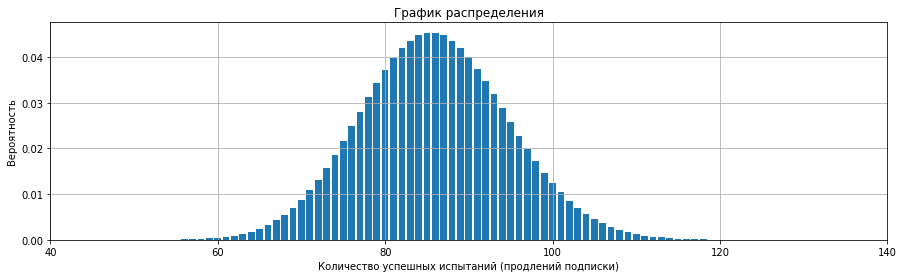

In [ ]:

def n_selection(k, n, p):
    for step in [100, 10, 1]:
        while round(1 - st.binom.cdf(k, n + step, p), 3) <= alpha:
            n += step
    if alpha - (1 - st.binom.cdf(k, n, p)) < alpha - (1 - st.binom.cdf(k, n + 1, p)):
        return n
    else:
        return n + 1

k = 100
n = 0
p = 0.1
alpha = 0.05

n = n_selection(k, n, p)
distr = []
for k in range(0, n + 1):
    current_value = st.binom.pmf(k, n, p)
    distr.append(current_value)

reload(plt)
plt.figure(figsize=(15, 4))
plt.bar(range(0, n + 1), distr)
plt.xlim(40,140)
plt.grid(True)
plt.title('График распределения')
plt.xlabel('Количество успешных испытаний (продлений подписки)')
plt.ylabel('Вероятность');

In [ ]:
n

859

Вывод:

По результатам работы функции получаем, что минимальное количество бесплатных подписок, которое необходимо раздать пользователям, чтобы получить 100 продлений с вероятностью около 95% - 859 подписок.

Задача

Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40% получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

Решение

Построим нормальное распределение по заданным по условию мат. ожиданием и СКО. Для них построим график распределения, а затем определим вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

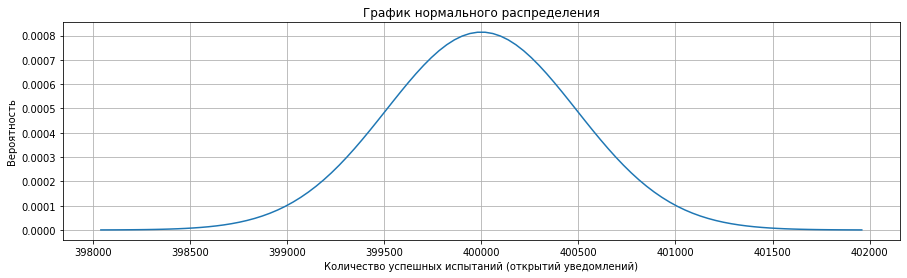

In [ ]:
n = 1000000
p = 0.4

mu = n * p
sigma = sqrt(n * p * (1 - p))
distr = st.norm(mu, sigma)

plt.figure(figsize=(15, 4))
plt.grid(True)
plt.title('График нормального распределения')
plt.xlabel('Количество успешных испытаний (открытий уведомлений)')
plt.ylabel('Вероятность')
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
plt.plot(x, distr.pdf(x))
plt.show()

In [ ]:
round(distr.cdf(399500) * 100, 2)

15.37

Вывод:

При заданных характеристиках полученная вероятность составляет примерно 15.37 %

### Шаг 8. Общий вывод

В рамках данного задания нами были загружены и описаны данные, затем из них были удалены выбросы и аномальные значения. Затем данные были исследованы и объединены для удобства работы с ними в 1 датафрейм. На основе полученного датафрейма была составлена сводная таблица с данными о выручке по каждому пользователю за каждый месяц.

В результате проверки гипотез оказалось, что пользователи с подпиской пользуются самокатами по времени больше, чем пользователи без подписки, причем в среднем они проезжают меньше 3130 м. Анализ выручки показал, что пользователи с подпиской приносят компании меньше выручки, чем пользователи без подписки.

Для исправления этой ситуации возможен либо более тщательный подбор параметров (цена на подписку и за минуту проката), чтобы повысить доход от каждого пользователя, либо работа над рекламой и продвижением подписки, чтобы повысить количество пользователей с подпиской.